# Get and explore dataset

In [189]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import re

In [190]:
# Make results reproducible - set random seed
from numpy.random import seed
seed(42)

In [191]:
negative_file = "negative.txt"
positive_file = "positive.txt"

In [192]:
# Do not modify - helper function to load and preprocess data
def filter_words(line):    
    line = re.sub(r'[^\w\s]','',line.rstrip())
    words = line.split(" ") 
    words = [i.lower() for i in words if i]      
    return " ".join(words)

def load_data(filename):
    thefile = open(filename, 'r') 
    lines = thefile.readlines() 

    data = []
    for l in range(0,len(lines)): 
        if(lines[l-1].strip() == "<title>"): 
            theline = filter_words(lines[l])
            if(len(theline) < 50):
                data.append(theline)            
            
    return data

# Helper function to convert categorical data to class label
def to_word_label(y):
    y = to_class(y)   
    return ["positive" if i==0 else "negative" for i in y]

# Helper function to convert class label to numeric label
def to_numeric_label(y):
  return [0 if i=="positive" else 1 for i in word_labels]

# Helper function: this function needs to be called before sending arrays to sklearn metrics,
# it converts back to class form from categorical form. ie: [1,0] --> 0, [0,1] --> 1
def to_class(y):
    return np.argmax(y,axis=1) 

In [193]:
positive = load_data(positive_file)
negative = load_data(negative_file)

print(positive[0:10])
print(negative[0:10])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book', 'to the point and beautifully illustrated', 'at least somebody has got it', 'beautifully written heartwarming story', 'an excellent cookbook full of delicious recipes', 'an outstanding resource']
['horrible book horrible', 'shallow selfindulgence', 'horrible book horrible', 'disappointment', 'a disappointing mess', 'save your money there are better books out there', 'thank you but no thanks', 'unendurable', 'the hard way', 'some good info among the political commercial']


In [194]:
# Do not modify - Combines the positive and negative reviews into a single list and create labels
data = positive + negative
word_labels = ["positive"] * len(positive) + ["negative"] * len(negative) 

# Converts labels to numbers in one-hot encoding - [1, 0] (positive) or [0, 1] (negative)

from tensorflow.keras.utils import to_categorical
labels  = to_categorical(to_numeric_label(word_labels))

In [195]:
# Write some code to investigate the dataset. 
# - Calculate and report the mean review size, its standard deviation and create a boxplot.
# - Calculate the number of unique words in the dataset
# - Perform any other dataset investigation that you feel would be valuable
 

The mean is 4.34
The standard deviation is 2.17


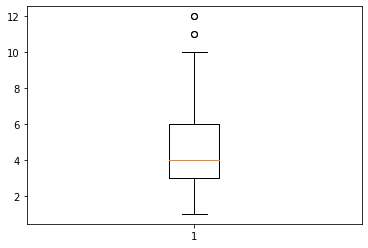

There are 2559 unique words in the dataset
There are 1793 reviews in the dataset


In [196]:
import statistics as stats

lengths =[]
for review in data:
    num_words = review.split()
    lengths.append(len(num_words))

mean = stats.mean(lengths)
deviation = stats.stdev(lengths)
print(f"The mean is {round(mean, 2)}")
print(f"The standard deviation is {round(deviation, 2)}")
plt.boxplot(x=lengths)
plt.show()

# - Calculate the number of unique words in the dataset
all_words = ' '.join(data)
words = all_words.split()
unique = len(set(words))
print(f"There are {unique} unique words in the dataset")

# - Perform any other dataset investigation that you feel would be valuable
print(f"There are {len(data)} reviews in the dataset")

# https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/visualization/boxplot.html

In [197]:
# Do not modify - Tokenize the vocabulary 
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=25)

tokenizer.fit_on_texts(data) #create the vocabularry

tokenized_data = tokenizer.texts_to_sequences(data) #tokenize the data using the vocabulary

vocab_size = len(tokenizer.word_index) + 1 

# Compare a sample of the data before and after tokenization
print(data[0:5])
print(tokenized_data[0:5])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book']
[[18, 4, 2, 19], [2, 4, 2], [], [6, 4], [1, 12, 3]]


# Pre-processing

In [198]:
# Pre-processing
# Write some code to pre-process the data so that each review is the same length
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
padded_data = pad_sequences(tokenized_data, maxlen= 4)

print(padded_data[0:5])

[[18  4  2 19]
 [ 0  2  4  2]
 [ 0  0  0  0]
 [ 0  0  6  4]
 [ 0  1 12  3]]


In [199]:
# Write some code to split the data into a training and test set. Make sure you shuffle the data. Use 20% for the test set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_data, labels, test_size=0.2, random_state=42)

print(X_train)
print(y_train)

# https://www.askpython.com/python/examples/split-data-training-and-testing-set?msclkid=54f3c98ea77111ecbe1e36ed1731553d

[[ 0 23  2  4]
 [ 0  0  4 11]
 [ 0  2  8  6]
 ...
 [ 0  0 21  9]
 [ 0  0  0  0]
 [ 0  0  0  0]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [213]:
print("x_train shape: {}".format(X_train.shape))
print("x_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

x_train shape: (1434, 4)
x_test shape: (359, 4)
y_train shape: (1434, 2)
y_test shape: (359, 2)


In [229]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,classification_report
# Fill in the following function so it
# - makes a prediction for the test set given the model
# - reports the precision, recall and f1 score. Also print the confusion matrix. 
# You will need to use the helper to_class function to convert y_pred and y_test before supplying them to the sklearn functions.

def assess_model(model, X_test, y_test):
      #To do
    prediction = model.predict(X_test)
    prediction = to_class(prediction)
    y          = to_class(y_test)    
    
    # Precision score
    precision = precision_score(y , prediction)
    print("Precision Score: %.2f" % (precision))
    # Recall Score
    recall = recall_score(y, prediction)
    print("Recall Score: %.2f" % (recall))
    f1 = f1_score(y, prediction)
    # F1 Score
    print("F1 Score: %.2f" % (f1))
    # Confusion Matrix
    print("Confusion matrix:")
    print(confusion_matrix(y, prediction))

# Build and tune model

Define network architecture

In [222]:
# Import model dependecies
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, BatchNormalization,Dropout
from keras.models import Sequential

model = Sequential()
input_dim = unique
output_dim = 10
input_length = 4

model.add(Embedding(input_dim, output_dim, input_length=input_length))
model.add(SpatialDropout1D(0.2))

model.add(BatchNormalization())

# Recurrent layer
model.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))


model.add(Dense(64, input_dim=8, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(2, activation="sigmoid"))

# Dropout for regularization
model.add(Dropout(0.5))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print (model.summary())

# https://www.analyticsvidhya.com/blog/2021/05/develop-your-first-deep-learning-model-in-python-with-keras/
# https://stackoverflow.com/questions/62241417/how-to-improve-lstm-model-predictions-and-accuracy

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_27 (Embedding)    (None, 4, 10)             25590     
                                                                 
 spatial_dropout1d_27 (Spati  (None, 4, 10)            0         
 alDropout1D)                                                    
                                                                 
 batch_normalization_8 (Batc  (None, 4, 10)            40        
 hNormalization)                                                 
                                                                 
 lstm_19 (LSTM)              (None, 64)                19200     
                                                                 
 dense_67 (Dense)            (None, 64)                4160      
                                                                 
 dense_68 (Dense)            (None, 64)              

Train model

In [223]:
# Specify parameter for model fitting
n_epochs = 5
batch_size = 10

history = model.fit(X_train,y_train, 
                    batch_size=batch_size, epochs=n_epochs)

# ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

Epoch 1/5
144/144 [==============================] - 4s 10ms/step - loss: 4.2502 - accuracy: 0.5049
Epoch 2/5
144/144 [==============================] - 1s 9ms/step - loss: 4.3513 - accuracy: 0.4902
Epoch 3/5
144/144 [==============================] - 1s 9ms/step - loss: 4.1982 - accuracy: 0.5181
Epoch 4/5
144/144 [==============================] - 1s 10ms/step - loss: 3.9865 - accuracy: 0.5425
Epoch 5/5
144/144 [==============================] - 1s 10ms/step - loss: 4.1651 - accuracy: 0.5272


Examine performance of model

In [230]:
# assessing the model 

assess_model(model, X_test, y_test)



Precision Score: 0.61
Recall Score: 0.71
F1 Score: 0.65
Confusion matrix:
[[ 92  84]
 [ 53 130]]


Plot graphs for accuracy and loss

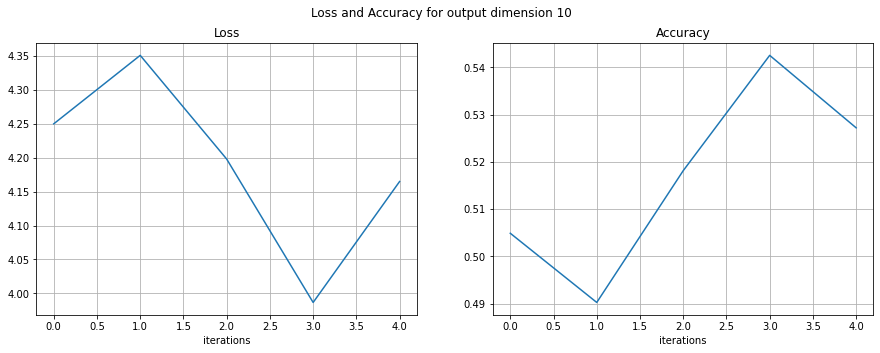

In [244]:
def plot_loss_acc(history, output_dim):
    """
    This function plots the accuracy and loss of a model over the number of epochs
    """
    fig = plt.figure(figsize=(15, 5))
    fig.suptitle(f'Loss and Accuracy for output dimension {output_dim}')
    
    # plot loss
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history['loss'])
    ax.grid(True)
    ax.set(xlabel='iterations', title='Loss')
    
    #plot accuracy
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history['accuracy'])
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

    plt.show()
    
plot_loss_acc(history, 10)

# https://www.kaggle.com/code/carpiliengpatbaul/usecaseproditec

In [248]:
# model 2

model_2 = Sequential()

# change output dimension layer 
output_dim = 25

model_2.add(Embedding(input_dim, output_dim, input_length=input_length))
model_2.add(SpatialDropout1D(0.2))

model_2.add(BatchNormalization())

# Recurrent layer
model_2.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))


model_2.add(Dense(64, input_dim=8, activation="relu"))
model_2.add(Dense(64, activation="relu"))
model_2.add(Dense(2, activation="sigmoid"))

# Dropout for regularization
model_2.add(Dropout(0.5))

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

n_epochs = 5
batch_size = 10

history_2 = model_2.fit(X_train,y_train, 
                    batch_size=batch_size, epochs=n_epochs)

Epoch 1/5
144/144 [==============================] - 4s 11ms/step - loss: 4.6952 - accuracy: 0.5139
Epoch 2/5
144/144 [==============================] - 2s 11ms/step - loss: 4.0932 - accuracy: 0.4979
Epoch 3/5
144/144 [==============================] - 1s 10ms/step - loss: 4.2582 - accuracy: 0.4861
Epoch 4/5
144/144 [==============================] - 1s 9ms/step - loss: 4.2582 - accuracy: 0.5153
Epoch 5/5
144/144 [==============================] - 1s 9ms/step - loss: 4.2242 - accuracy: 0.5265


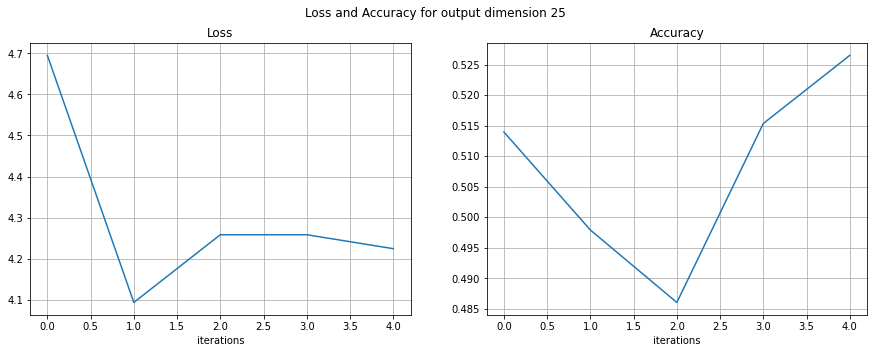

In [250]:
plot_loss_acc(history_2 , 25)

In [251]:
# model 3

model_3 = Sequential()

output_dim = 50


model_3.add(Embedding(input_dim, output_dim, input_length=input_length))
model_3.add(SpatialDropout1D(0.2))

model_3.add(BatchNormalization())

# Recurrent layer
model_3.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))


model_3.add(Dense(64, input_dim=8, activation="relu"))
model_3.add(Dense(64, activation="relu"))
model_3.add(Dense(2, activation="sigmoid"))

# Dropout for regularization
model_3.add(Dropout(0.5))

model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

n_epochs = 5
batch_size = 10

history_3 = model_3.fit(X_train,y_train, 
                    batch_size=batch_size, epochs=n_epochs)

Epoch 1/5
144/144 [==============================] - 5s 11ms/step - loss: 4.2294 - accuracy: 0.5244
Epoch 2/5
144/144 [==============================] - 1s 10ms/step - loss: 4.1951 - accuracy: 0.5049
Epoch 3/5
144/144 [==============================] - 1s 10ms/step - loss: 4.1490 - accuracy: 0.5321
Epoch 4/5
144/144 [==============================] - 1s 10ms/step - loss: 4.1602 - accuracy: 0.5293
Epoch 5/5
144/144 [==============================] - 1s 10ms/step - loss: 4.3239 - accuracy: 0.5119


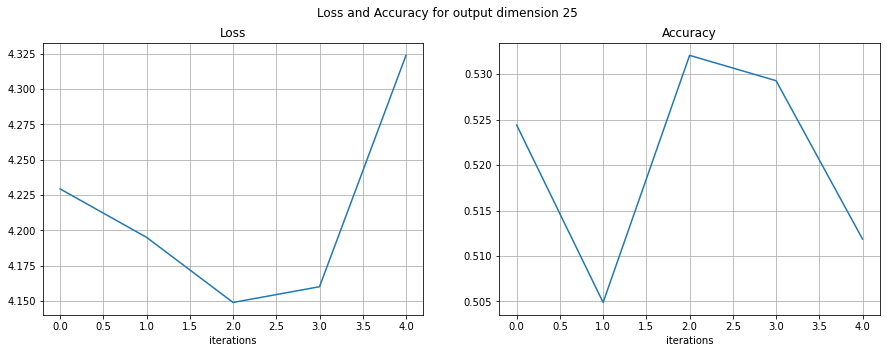

In [252]:
plot_loss_acc(history_3, 25)

In [253]:
# model 4
model_4 = Sequential()

output_dim = 10


model_4.add(Embedding(input_dim, output_dim, input_length=input_length))
model_4.add(SpatialDropout1D(0.2))

model_4.add(BatchNormalization())

# Recurrent layer
model_4.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))


model_4.add(Dense(64, input_dim=8, activation="relu"))
model_4.add(Dense(64, activation="relu"))
model_4.add(Dense(2, activation="sigmoid"))

# Dropout for regularization
model_4.add(Dropout(0.5))

model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

n_epochs = 5
batch_size = 10

history_4 = model_4.fit(X_train,y_train, 
                    batch_size=batch_size, epochs=n_epochs)

Epoch 1/5
144/144 [==============================] - 5s 10ms/step - loss: 4.5339 - accuracy: 0.5126
Epoch 2/5
144/144 [==============================] - 1s 10ms/step - loss: 4.2600 - accuracy: 0.4937
Epoch 3/5
144/144 [==============================] - 1s 10ms/step - loss: 4.3899 - accuracy: 0.5014
Epoch 4/5
144/144 [==============================] - 1s 9ms/step - loss: 4.3440 - accuracy: 0.4902
Epoch 5/5
144/144 [==============================] - 1s 9ms/step - loss: 4.0971 - accuracy: 0.5300


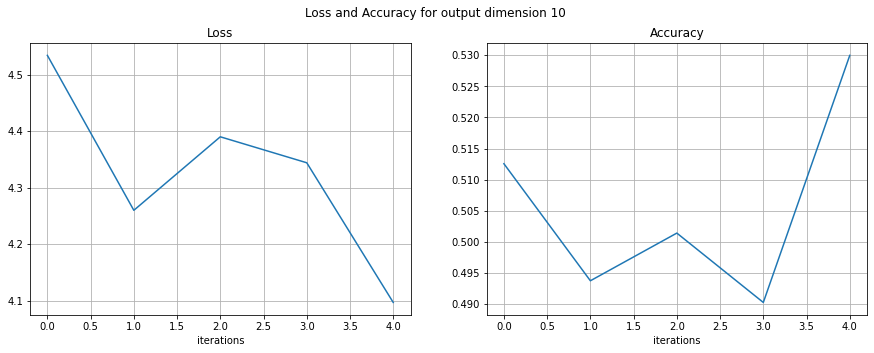

In [254]:
plot_loss_acc(history_4, 10)

# Make a prediction

In [258]:
# This is a very small set of completed new data to use to make predictions.
prediction_data = ["this book is fabulous","i hated this book", "the best", "no good", "okay"]
tokenized = tokenizer.texts_to_sequences(prediction_data)
padded = pad_sequences(tokenized, padding='post', maxlen=4)

# Supply this data to each of your models and see how it does. 
# You can call the helper function "to_word_label" to map the output of the model to the name of the
# class it was predicted to belong to.






In [259]:
# Predict using model 1 output_dim = 10
pred = model.predict(padded)
to_word_label(pred)

['positive', 'positive', 'positive', 'positive', 'positive']

In [260]:
# Predict using model 2 output_dim = 25
pred = model_2.predict(padded)
to_word_label(pred)

['negative', 'negative', 'positive', 'negative', 'negative']

In [261]:
# Predict using model 3 output_dim = 50
pred = model_3.predict(padded)
to_word_label(pred)

['negative', 'negative', 'positive', 'negative', 'negative']

In [262]:
# Predict using model 4 output_dim = 100
pred = model_4.predict(padded)
to_word_label(pred)

['negative', 'negative', 'positive', 'negative', 'negative']

In [263]:
print ("Some prediction like the one for model 1 are showing positive prediction while others show negative. This could be a result of some erros in the model")

Some prediction like the one for model 1 are showing positive prediction while others show negative. This could be a result of some erros in the model


In [ ]:
# https://github.com/MattFindlay/BookReviews_RNN/blob/11f48c35efbfe30b0912b94f6b5ea3a01f23104f/L3T20.ipynb